In [1]:
# Import the Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Data

sales_data = pd.read_csv('Train.csv')

In [69]:
print(sales_data.head())

   Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-11-08  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966 2016-10-11  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966 2016-10-11  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category 

In [5]:
print(sales_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
print(sales_data.describe())

            Row ID   Postal Code         Sales
count  9800.000000   9789.000000   9800.000000
mean   4900.500000  55273.322403    230.769059
std    2829.160653  32041.223413    626.651875
min       1.000000   1040.000000      0.444000
25%    2450.750000  23223.000000     17.248000
50%    4900.500000  58103.000000     54.490000
75%    7350.250000  90008.000000    210.605000
max    9800.000000  99301.000000  22638.480000


In [7]:
# Check for missing values

print(sales_data.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [10]:
# Clean the data

# Assuming "df" is your DataFrame containing the sales_data
# First, calculate the mean of the existing postal codes
mean_postal_code = sales_data['Postal Code'].mean()

# Then, fill the missing values with the mean
sales_data['Postal Code'].fillna(mean_postal_code, inplace=True)

In [11]:
print(sales_data.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


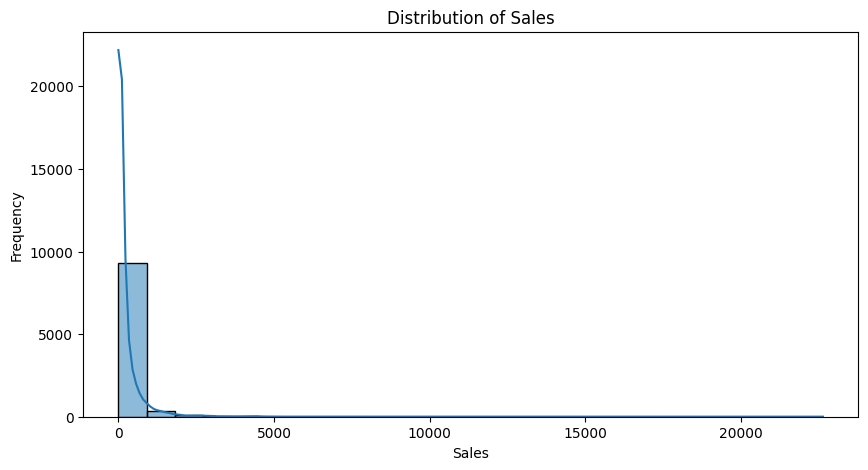

In [53]:
# Distribution of Sales

plt.figure(figsize=(10,5))
sns.histplot(sales_data['Sales'], bins=25, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

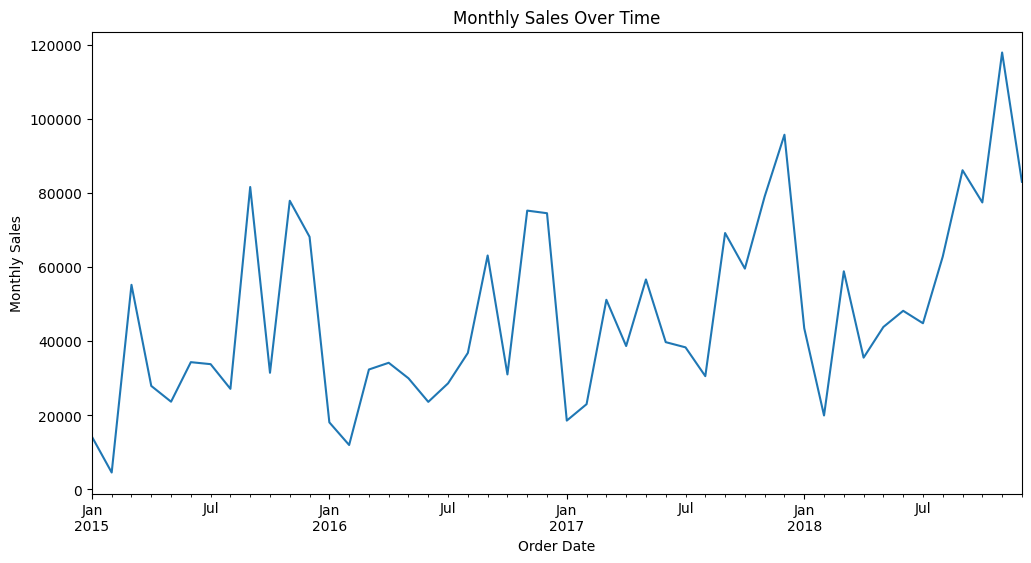

In [54]:
# Sales over time

# Convert 'Order Date' column to datetime with the correct format
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], format='%d/%m/%Y')

# Resample the data by month and calculate monthly sales
monthly_sales = sales_data.resample('M', on='Order Date')['Sales'].sum()

# Plotting
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line')
plt.xlabel('Order Date')
plt.ylabel('Monthly Sales')
plt.title('Monthly Sales Over Time')
plt.show()

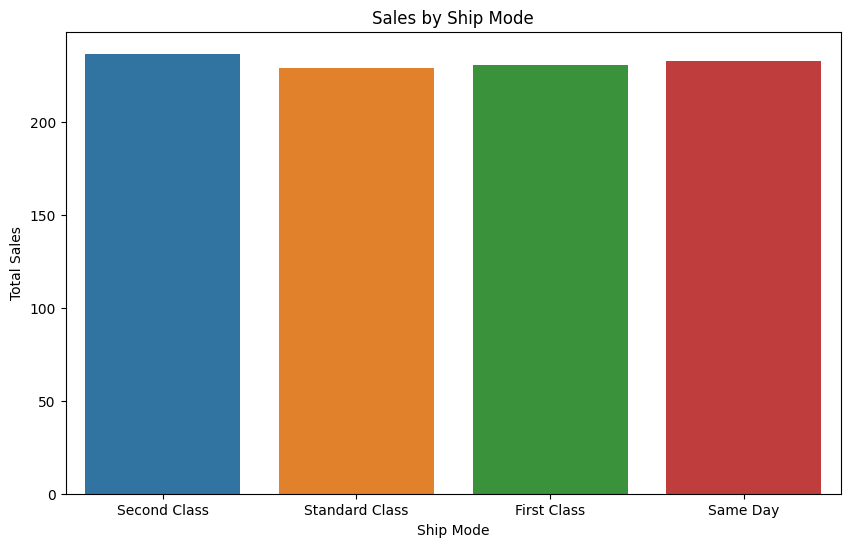

In [62]:
# Sales by Ship Mode

plt.figure(figsize=(10, 6))
sns.barplot(x='Ship Mode', y='Sales', data=sales_data, errorbar=None)
plt.title('Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')
plt.show()

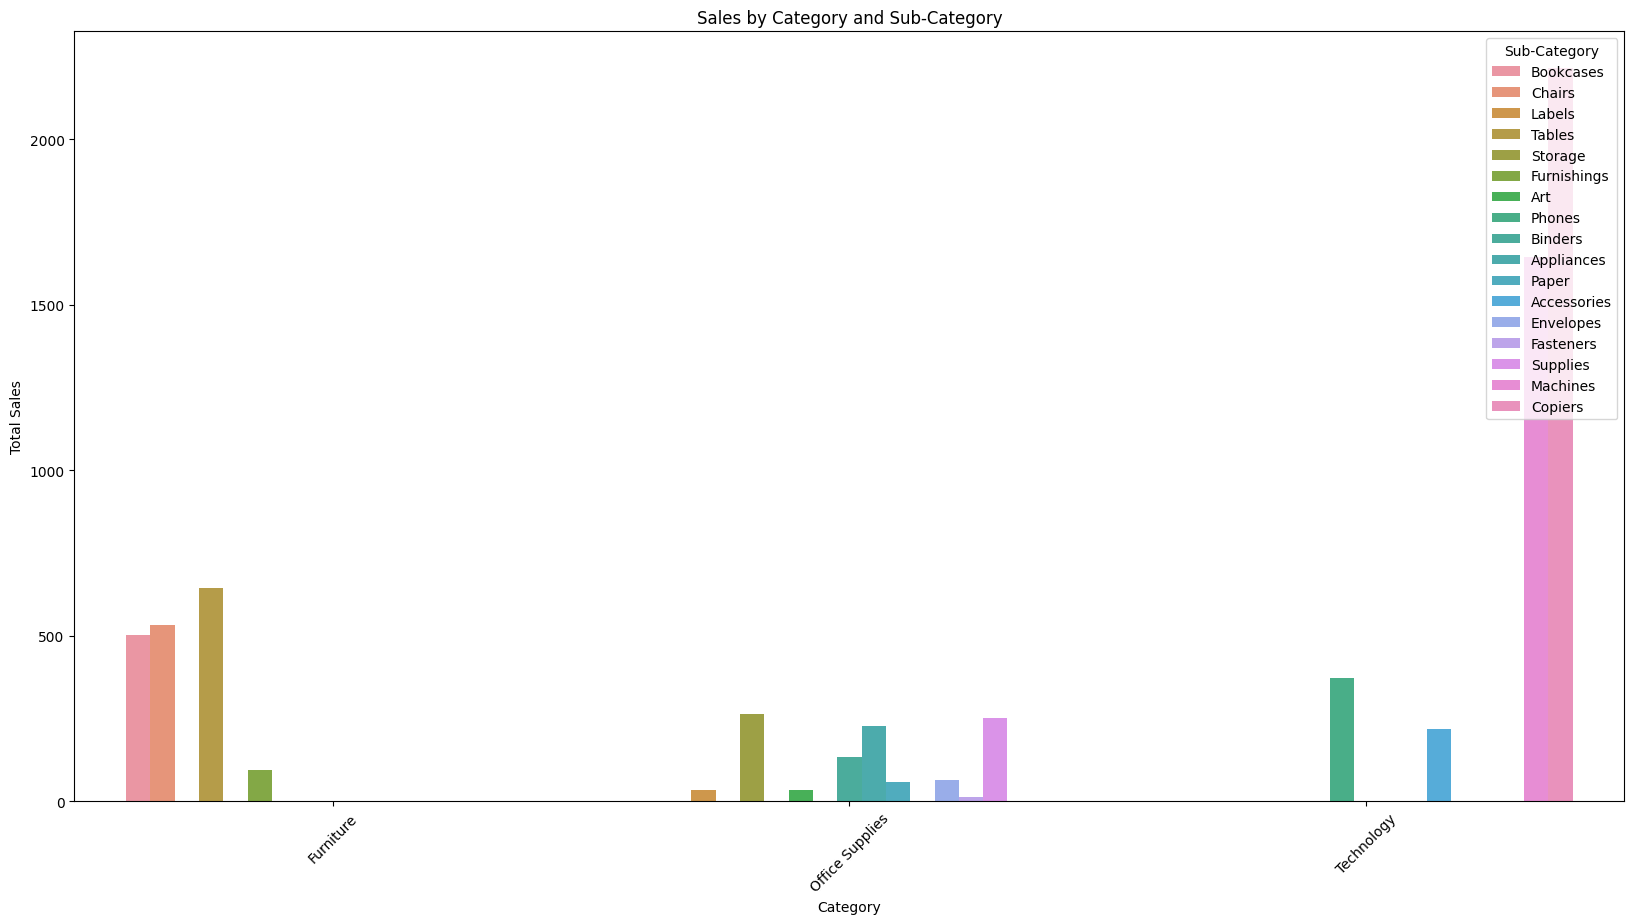

In [78]:
# Sales by Category and Sub-Category

plt.figure(figsize=(20, 10))
sns.barplot(x='Category', y='Sales', hue='Sub-Category', data=sales_data, errorbar=None)
plt.title('Sales by Category and Sub-Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.legend(title='Sub-Category', loc='upper right')
plt.xticks(rotation=45)
plt.show()

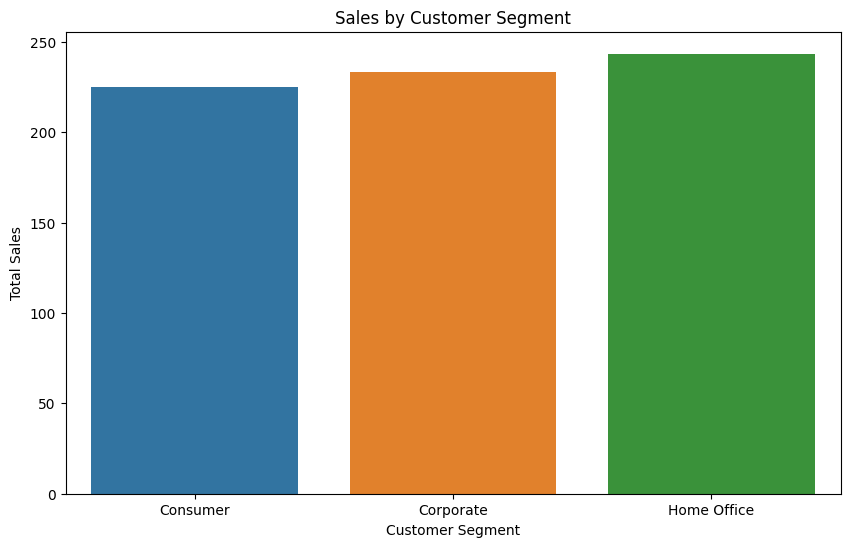

In [85]:
# Sales by Customer Segment

plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Sales', data=sales_data, errorbar=None)
plt.title('Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.show()

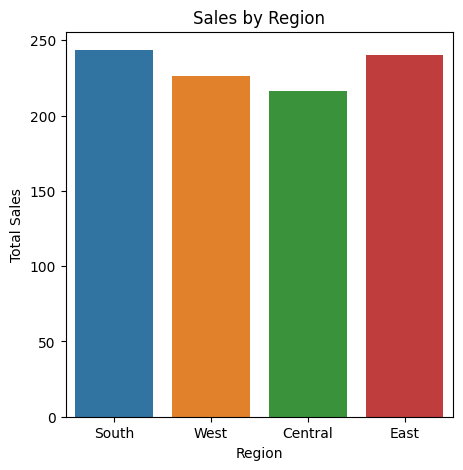

In [90]:
# Sales by Region

plt.figure(figsize=(5, 5))
sns.barplot(x='Region', y='Sales', data=sales_data, errorbar=None)
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

# Conclusion

‣ Clear seasonal patterns in sales data.
‣ Customers show preferences for certain shipping methods.
‣ Identification of most profitable product categories and sub-categories
‣ Analyzing sales data by region reveals local customer preferences


Thank You!